# Create territories
* Isolate voters in a single precinct
* Count # of under-voting black DEM voters
* Form into groups of 50-100 

In [50]:
#Imports
import os
import numpy as np
import pandas as pd
import geopandas as gpd
%matplotlib inline

## Data imports

In [41]:
#Import voter data
gdfVoters = gpd.read_file('./scratch/WakeVoterData.shp')
gdfVoters.columns

Index(['res_street', 'res_city_d', 'state_cd', 'zip_code', 'race_code',
       'ethnic_cod', 'party_cd', 'gender_cod', 'precinct_a', 'ncid',
       'st_address', 'city', 'zip', 'latitude', 'longitude', 'elections',
       'geometry'],
      dtype='object')

In [42]:
#Import wake blocks
gdfBlocks = gpd.read_file('./scratch/wake_blocks.shp')
gdfVoters.columns

Index(['res_street', 'res_city_d', 'state_cd', 'zip_code', 'race_code',
       'ethnic_cod', 'party_cd', 'gender_cod', 'precinct_a', 'ncid',
       'st_address', 'city', 'zip', 'latitude', 'longitude', 'elections',
       'geometry'],
      dtype='object')

In [36]:
#Import precinct data; ssubset for Wake
gdfPrecinctsAll = gpd.read_file('./data/spatial/Precincts2.shp')
gdfPrecincts = gdfPrecinctsAll[gdfPrecinctsAll.county_nam == 'WAKE']
gdfPrecincts.columns

Index(['id', 'prec_id', 'enr_desc', 'county_nam', 'of_prec_id', 'county_id',
       'geometry'],
      dtype='object')

## Data subsets and overlay

In [45]:
#Subset black democrats from voter database
gdfBDems = gdfVoters[(gdfVoters.party_cd == 'DEM') &
                    (gdfVoters.race_code == 'B')].reset_index()

In [47]:
#Spatially join the blockid10 to each voter record
dfBDems2 = gpd.sjoin(left_df = gdfBDems, 
                     right_df = gdfBlocks,
                     how = 'inner',
                     op = 'intersects'
                    )

In [49]:
#Save
if not os.path.exists('./scratch/bdems.shp'): 
    dfBDems2.to_file('./scratch/bdems.shp')

In [57]:
#Tally voters in each block
block_counts = dfBDems2.BLOCKID10.value_counts().reset_index()
block_counts.columns=['BLOCKID10','voters']

In [58]:
#Join to block features
gdfBlocks2 = pd.merge(gdfBlocks,block_counts,on='BLOCKID10',how='inner')

In [60]:
gdfBlocks2.to_file('./scratch/BlockData.shp')

In [15]:
gdfPct = gdfVoters[(gdfVoters.precinct_a == '07-11') & 
                   (gdfVoters.party_cd == 'DEM') &
                   (gdfVoters.race_code == 'B')
                  ].reset_index()
gdfPct.shape

(23, 18)

In [24]:
#Group and tally voters
precinct_counts = dfBDems['precinct_a'].value_counts().reset_index()
precinct_counts.columns=['precinct','voters']

In [37]:
#Merge with precinct features
gdfPrecincts = pd.merge(gdfPrecincts,precinct_counts,left_on='prec_id',right_on='precinct',how='inner')

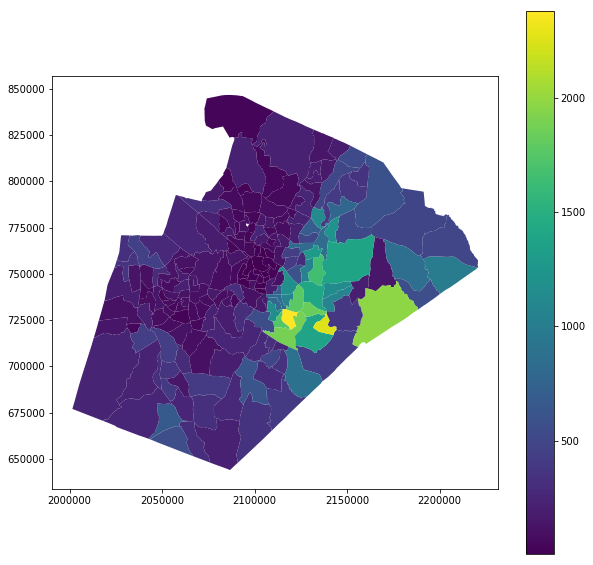

In [39]:
gdfPrecincts.plot('voters',figsize = (10,10),legend=True);